In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import math

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics


import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier


In [2]:
#import dataset
dataset = pd.read_csv('diabetic_data.csv')

#replace '?' with nan
dataset = dataset.replace('?', np.NaN)
dataset.isnull().sum()

#create label and fix
label = dataset.filter(items=['readmitted'])
label = label.replace('<30',1).replace('>30',0).replace('NO',0)

#drop unnessasary feature to create train dataset
dataset = dataset.drop(columns=['encounter_id','patient_nbr','readmitted'])
# age feature processing
for i,row in enumerate(dataset['age']):
    dataset['age'][i] = int(row.split('-')[-1].replace(')',""))
# weight feature processing
for i,row in enumerate(dataset['weight']):
    if dataset['weight'][i] is np.NAN:
        dataset['weight'][i] = 0
    else:
        dataset['weight'][i] = 1
        
for i,row in enumerate(dataset['diag_1']):
    if 'V' in str(dataset['diag_1'][i]):
         dataset['diag_1'][i] = np.nan
for i,row in enumerate(dataset['diag_2']):
    if 'V' in str(dataset['diag_2'][i]):
         dataset['diag_2'][i] = np.nan
for i,row in enumerate(dataset['diag_3']):
    if 'V' in str(dataset['diag_3'][i]):
         dataset['diag_3'][i] = np.nan
            
            

train = dataset

/Users/uiyunkim/opt/anaconda3/envs/healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/uiyunkim/opt/anaconda3/envs/healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/uiyunkim/opt/anaconda3/envs/healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [3]:
numeric_features = ['time_in_hospital', 'age','num_lab_procedures','num_procedures',
                    'num_medications', 'number_outpatient','number_emergency',
                    'number_inpatient','number_diagnoses', 'diag_1', 'diag_2', 'diag_3']
#numeric_features = ['time_in_hospital', 'age','num_lab_procedures']
categorical_features = ['race', 'gender','admission_type_id',
                        'discharge_disposition_id','admission_source_id',
                        'payer_code', 'max_glu_serum',
                        'A1Cresult', 'metformin','repaglinide', 'nateglinide',
                        'chlorpropamide', 'glimepiride','acetohexamide', 
                        'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 
                        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                        'tolazamide', 'examide', 'citoglipton', 'insulin',
                        'glyburide-metformin', 'glipizide-metformin',
                        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                        'metformin-pioglitazone', 'change', 'diabetesMed','medical_specialty']
#categorical_features = ['race', 'gender','admission_type_id']
no_use_category = []

In [4]:
numeric_data = []
for feat in numeric_features:
    print(feat)
    print(list(train.groupby(feat).groups.keys()))
    numeric_data.append(list(train.groupby(feat).groups.keys()))

time_in_hospital
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
age
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
num_lab_procedures
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 113, 114, 118, 120, 121, 126, 129, 132]
num_procedures
[0, 1, 2, 3, 4, 5, 6]
num_medications
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 79, 81]
number_outpatient
[0, 1, 2, 3, 4, 5, 6, 7,

In [5]:
category_data = []
for feat in categorical_features:
    print(feat)
    print(list(train.groupby(feat).groups.keys()))
    category_data.append(list(train.groupby(feat).groups.keys()))


race
['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
gender
['Female', 'Male', 'Unknown/Invalid']
admission_type_id
[1, 2, 3, 4, 5, 6, 7, 8]
discharge_disposition_id
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28]
admission_source_id
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 20, 22, 25]
payer_code
['BC', 'CH', 'CM', 'CP', 'DM', 'FR', 'HM', 'MC', 'MD', 'MP', 'OG', 'OT', 'PO', 'SI', 'SP', 'UN', 'WC']
max_glu_serum
['>200', '>300', 'None', 'Norm']
A1Cresult
['>7', '>8', 'None', 'Norm']
metformin
['Down', 'No', 'Steady', 'Up']
repaglinide
['Down', 'No', 'Steady', 'Up']
nateglinide
['Down', 'No', 'Steady', 'Up']
chlorpropamide
['Down', 'No', 'Steady', 'Up']
glimepiride
['Down', 'No', 'Steady', 'Up']
acetohexamide
['No', 'Steady']
glipizide
['Down', 'No', 'Steady', 'Up']
glyburide
['Down', 'No', 'Steady', 'Up']
tolbutamide
['No', 'Steady']
pioglitazone
['Down', 'No', 'Steady', 'Up']
rosiglitazone
['Down', 'No', 'Steady', 'U

In [6]:
#Encode label with categorical LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoded_label = LabelEncoder().fit_transform(label)
print(encoded_label)

[0 0 0 ... 0 0 0]


/Users/uiyunkim/opt/anaconda3/envs/healthcare/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

In [112]:
for feature in ['diag_1','diag_2','diag_3']:
    train[feature] = pd.to_numeric(train[feature],errors='coerce')
    
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.1)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

91589
10177
91589
10177


1  :  0.802790606269038
2  :  0.8719661982902623
3  :  0.8555566473420458
4  :  0.8770757590645574
5  :  0.8722609806426256
6  :  0.8791392355310995
7  :  0.8777635845534048
8  :  0.8821853198388523
9  :  0.880023582588189


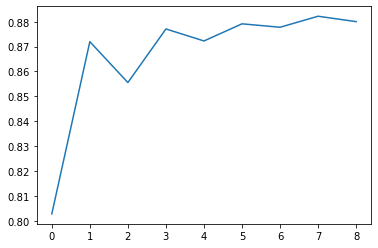

In [113]:
numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('scaler', StandardScaler()),
     ('normalize',Normalizer()),
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('ordinal',OrdinalEncoder(categories=category_data)),
    #('box-cox',PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler()),
    #('minmax',MinMaxScaler()),
    ('normalize',Normalizer()),
    #('onehot', OneHotEncoder(categories=category_data,handle_unknown='ignore')),
    #('scaler', StandardScaler()),
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train.filter(items=numeric_features+categorical_features).to_csv("before.csv")
X_train = preprocessor.fit_transform(X_train)

pd.DataFrame(X_train).to_csv("after.csv")
X_test = preprocessor.fit_transform(X_test)

# iter_range = range(200,204)
# acc_list =[]
# for i in iter_range:
#     model = LogisticRegression()
#     model.fit(X_train,y_train.values.ravel())
#     result = model.score(X_test,y_test.values.ravel())
#     print(i,' : ',result)
#     acc_list.append(result)

# plt.plot(acc_list)
# plt.show()


iter_range = range(1,10)
acc_list =[]
for i in iter_range:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train.values.ravel())
    result = model.score(X_test,y_test.values.ravel())
    print(i,' : ',result)
    acc_list.append(result)

plt.plot(acc_list)
plt.show()

